In [2]:

# check prophet version
import prophet
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.0


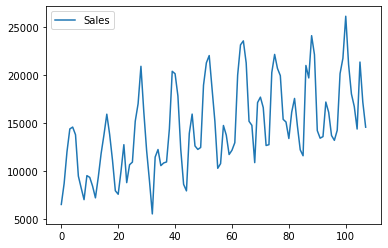

In [3]:
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()

In [4]:
df.dtypes

Month    object
Sales     int64
dtype: object

In [5]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [6]:
...
# prepare expected column names
from pandas import to_datetime
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [7]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [8]:
df.head()

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587


In [9]:
from prophet import Prophet
# define the model
model = Prophet()
# fit the model
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
from pandas import DataFrame
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [16]:
future.describe

<bound method NDFrame.describe of            ds
0  1968-01-01
1  1968-02-01
2  1968-03-01
3  1968-04-01
4  1968-05-01
5  1968-06-01
6  1968-07-01
7  1968-08-01
8  1968-09-01
9  1968-10-01
10 1968-11-01
11 1968-12-01>

In [12]:
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14344.429315  12678.939396  16012.989327
1 1968-02-01  14911.718770  13335.533650  16524.076160
2 1968-03-01  20859.142961  19215.982957  22350.216343
3 1968-04-01  22883.352978  21342.941511  24489.192486
4 1968-05-01  24183.139264  22639.591426  25662.187317


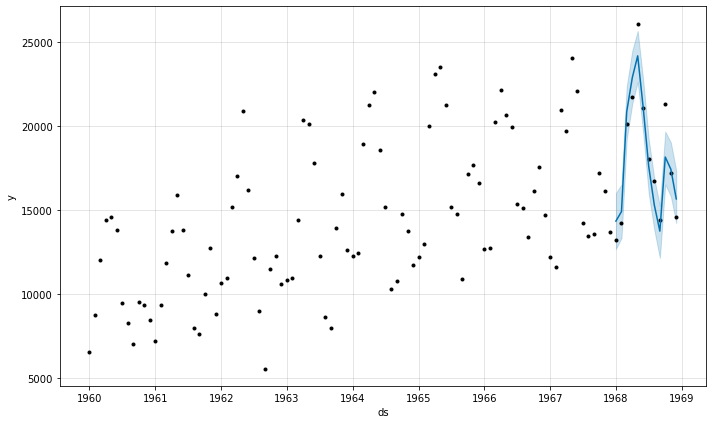

In [13]:
# plot forecast
model.plot(forecast)
pyplot.show()

In [ ]:
# https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/